In [1]:
import xgcm
import xarray as xr
import numpy as np
from xbasin import remap_vertical, compute_moc
from matplotlib import pyplot as plt
import cmocean as cm
%load_ext memory_profiler

In [2]:
from dask.distributed import Client
client = Client(n_workers=1, threads_per_worker=1, memory_limit='1GB')
client

Client Scheduler: tcp://127.0.0.1:35875 Dashboard: http://127.0.0.1:8787/status,Cluster Workers: 1 Cores: 1 Memory: 1000.00 MB


We open the example data and create 2 grids: 1 for the dataset we have and 1 for the remapped one.
Here '_fr' means *from* and '_to' *to* (i.e. remapped data).

In [3]:
ds = xr.open_dataset('data/nemo_output_ex.nc')

from xnemogcm import open_nemo_and_domain_cfg
ds = open_nemo_and_domain_cfg(datadir='/home/romain/Documents/Education/PhD/Courses/2019-OC6310/Project/Experiments/EXP_eos00/Rawdata')

In [4]:
ds = ds.chunk({'t':5})
ds

<xarray.Dataset>
Dimensions:        (axis_nbounds: 2, t: 5, x_c: 21, x_f: 21, y_c: 40, y_f: 40, z_c: 36, z_f: 36)
Coordinates:
  * z_f            (z_f) float64 -0.5 0.5 1.5 2.5 3.5 ... 31.5 32.5 33.5 34.5
  * t              (t) object 7756-01-01 00:00:00 ... 7796-01-01 00:00:00
  * x_c            (x_c) int64 0 1 2 3 4 5 6 7 8 ... 12 13 14 15 16 17 18 19 20
  * y_c            (y_c) int64 0 1 2 3 4 5 6 7 8 ... 31 32 33 34 35 36 37 38 39
  * z_c            (z_c) int64 0 1 2 3 4 5 6 7 8 ... 27 28 29 30 31 32 33 34 35
  * x_f            (x_f) float64 0.5 1.5 2.5 3.5 4.5 ... 17.5 18.5 19.5 20.5
  * y_f            (y_f) float64 0.5 1.5 2.5 3.5 4.5 ... 36.5 37.5 38.5 39.5
Dimensions without coordinates: axis_nbounds
Data variables:
    depthw_bounds  (z_f, axis_nbounds) float32 dask.array<chunksize=(36, 2), meta=np.ndarray>
    t_bounds       (t, axis_nbounds) object dask.array<chunksize=(5, 2), meta=np.ndarray>
    woce           (t, z_f, y_c, x_c) float32 dask.array<chunksize=(5, 36, 40, 21), meta=np.ndarray>
    e3w            (t, z_f, y_c, x_c) float32 dask.array<chunksize=(5, 36, 40, 21), meta=np.ndarray>
    deptht_bounds  (z_c, axis_nbounds) float32 dask.array<chunksize=(36, 2), meta=np.ndarray>
    e3t            (t, z_c, y_c, x_c) float32 dask.array<chunksize=(5, 36, 40, 21), meta=np.ndarray>
    thetao         (t, z_c, y_c, x_c) float32 dask.array<chunksize=(5, 36, 40, 21), meta=np.ndarray>
    so             (t, z_c, y_c, x_c) float32 dask.array<chunksize=(5, 36, 40, 21), meta=np.ndarray>
    rhop           (t, z_c, y_c, x_c) float32 dask.array<chunksize=(5, 36, 40, 21), meta=np.ndarray>
    tos            (t, y_c, x_c) float32 dask.array<chunksize=(5, 40, 21), meta=np.ndarray>
    sos            (t, y_c, x_c) float32 dask.array<chunksize=(5, 40, 21), meta=np.ndarray>
    zos            (t, y_c, x_c) float32 dask.array<chunksize=(5, 40, 21), meta=np.ndarray>
    bn2            (t, z_c, y_c, x_c) float32 dask.array<chunksize=(5, 36, 40, 21), meta=np.ndarray>
    mldr10_1       (t, y_c, x_c) float32 dask.array<chunksize=(5, 40, 21), meta=np.ndarray>
    relvor         (t, z_c, y_c, x_c) float32 dask.array<chunksize=(5, 36, 40, 21), meta=np.ndarray>
    qsr            (t, y_c, x_c) float32 dask.array<chunksize=(5, 40, 21), meta=np.ndarray>
    qns            (t, y_c, x_c) float32 dask.array<chunksize=(5, 40, 21), meta=np.ndarray>
    empmr          (t, y_c, x_c) float32 dask.array<chunksize=(5, 40, 21), meta=np.ndarray>
    qt             (t, y_c, x_c) float32 dask.array<chunksize=(5, 40, 21), meta=np.ndarray>
    saltflx        (t, y_c, x_c) float32 dask.array<chunksize=(5, 40, 21), meta=np.ndarray>
    botpres        (t, y_c, x_c) float32 dask.array<chunksize=(5, 40, 21), meta=np.ndarray>
    depthu_bounds  (z_c, axis_nbounds) float32 dask.array<chunksize=(36, 2), meta=np.ndarray>
    e3u            (t, z_c, y_c, x_f) float32 dask.array<chunksize=(5, 36, 40, 21), meta=np.ndarray>
    uos            (t, y_c, x_f) float32 dask.array<chunksize=(5, 40, 21), meta=np.ndarray>
    uo             (t, z_c, y_c, x_f) float32 dask.array<chunksize=(5, 36, 40, 21), meta=np.ndarray>
    depthv_bounds  (z_c, axis_nbounds) float32 dask.array<chunksize=(36, 2), meta=np.ndarray>
    e3v            (t, z_c, y_f, x_c) float32 dask.array<chunksize=(5, 36, 40, 21), meta=np.ndarray>
    vos            (t, y_f, x_c) float32 dask.array<chunksize=(5, 40, 21), meta=np.ndarray>
    vo             (t, z_c, y_f, x_c) float32 dask.array<chunksize=(5, 36, 40, 21), meta=np.ndarray>
    nav_lon        (y_c, x_c) float32 dask.array<chunksize=(40, 21), meta=np.ndarray>
    nav_lat        (y_c, x_c) float32 dask.array<chunksize=(40, 21), meta=np.ndarray>
    jpiglo         int32 ...
    jpjglo         int32 ...
    jpkglo         int32 ...
    jperio         int32 ...
    ln_zco         int32 ...
    ln_zps         int32 ...
    ln_sco         int32 ...
    ln_isfcav      int32 ...
    glamt          (y_c, x_c) float64 dask.array<chunksize=(40, 21), meta=np.nda

In [5]:
metrics_fr = {
    ('X',): ['e1t', 'e1u', 'e1v', 'e1f'],
    ('Y',): ['e2t', 'e2u', 'e2v', 'e2f'],
    ('Z',): ['e3t', 'e3u', 'e3v', 'e3w']
}
metrics_to = {
    ('X',): ['e1t', 'e1u', 'e1v', 'e1f'],
    ('Y',): ['e2t', 'e2u', 'e2v', 'e2f'],
    ('Z',): ['e3t_1d', 'e3w_1d']
}
grid_fr = xgcm.Grid(ds, periodic=False, metrics=metrics_fr)
grid_to = xgcm.Grid(ds, periodic=False, metrics=metrics_to)

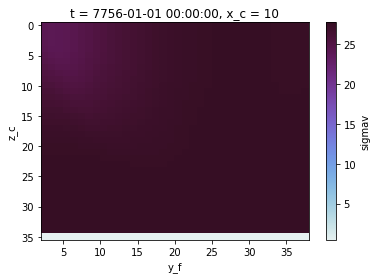

In [6]:
from xbasin.eos import compute_rho

rho = compute_rho(
    grid_fr.interp(ds.thetao,axis='Y', boundary='extrapolate'),
    grid_fr.interp(ds.so, axis='Y', boundary='extrapolate'),
    0,
    lambda1=4.9520e-2
) - 1000

ds['sigmav'] = rho

ds['sigmav'][{'t':0,'y_f':slice(2,-2),'x_c':10}].plot(cmap=cm.cm.dense)
plt.gca().invert_yaxis()

In [7]:
from xbasin import create_density_grid

ds = create_density_grid(
    ds,
    dd=0.01,
    rho=ds['sigmav']
)

metrics = {
    ('X',): ['e1t', 'e1u', 'e1v', 'e1f'],
    ('Y',): ['e2t', 'e2u', 'e2v', 'e2f'],
    ('Z',): ['e3t', 'e3u', 'e3v', 'e3w'],
    ('S',): ['e3t_s_1d', 'e3w_s_1d']
}
grid = xgcm.Grid(ds, periodic=False, metrics=metrics)
print(grid)
ds

<xgcm.Grid>
T Axis (not periodic):
  * center   t
S Axis (not periodic):
  * center   s_c --> left
  * left     s_f --> center
X Axis (not periodic):
  * center   x_c --> right
  * right    x_f --> center
Y Axis (not periodic):
  * center   y_c --> right
  * right    y_f --> center
Z Axis (not periodic):
  * center   z_c --> left
  * left     z_f --> center


<xarray.Dataset>
Dimensions:        (axis_nbounds: 2, s_c: 501, s_f: 501, t: 5, x_c: 21, x_f: 21, y_c: 40, y_f: 40, z_c: 36, z_f: 36)
Coordinates:
  * z_f            (z_f) float64 -0.5 0.5 1.5 2.5 3.5 ... 31.5 32.5 33.5 34.5
  * t              (t) object 7756-01-01 00:00:00 ... 7796-01-01 00:00:00
  * x_c            (x_c) int64 0 1 2 3 4 5 6 7 8 ... 12 13 14 15 16 17 18 19 20
  * y_c            (y_c) int64 0 1 2 3 4 5 6 7 8 ... 31 32 33 34 35 36 37 38 39
  * z_c            (z_c) int64 0 1 2 3 4 5 6 7 8 ... 27 28 29 30 31 32 33 34 35
  * x_f            (x_f) float64 0.5 1.5 2.5 3.5 4.5 ... 17.5 18.5 19.5 20.5
  * y_f            (y_f) float64 0.5 1.5 2.5 3.5 4.5 ... 36.5 37.5 38.5 39.5
  * s_c            (s_c) float64 0.0 1.0 2.0 3.0 4.0 ... 497.0 498.0 499.0 500.0
  * s_f            (s_f) float64 -0.5 0.5 1.5 2.5 ... 496.5 497.5 498.5 499.5
Dimensions without coordinates: axis_nbounds
Data variables:
    depthw_bounds  (z_f, axis_nbounds) float32 dask.array<chunksize=(36, 2), meta=np.ndarray>
    t_bounds       (t, axis_nbounds) object dask.array<chunksize=(5, 2), meta=np.ndarray>
    woce           (t, z_f, y_c, x_c) float32 dask.array<chunksize=(5, 36, 40, 21), meta=np.ndarray>
    e3w            (t, z_f, y_c, x_c) float32 dask.array<chunksize=(5, 36, 40, 21), meta=np.ndarray>
    deptht_bounds  (z_c, axis_nbounds) float32 dask.array<chunksize=(36, 2), meta=np.ndarray>
    e3t            (t, z_c, y_c, x_c) float32 dask.array<chunksize=(5, 36, 40, 21), meta=np.ndarray>
    thetao         (t, z_c, y_c, x_c) float32 dask.array<chunksize=(5, 36, 40, 21), meta=np.ndarray>
    so             (t, z_c, y_c, x_c) float32 dask.array<chunksize=(5, 36, 40, 21), meta=np.ndarray>
    rhop           (t, z_c, y_c, x_c) float32 dask.array<chunksize=(5, 36, 40, 21), meta=np.ndarray>
    tos            (t, y_c, x_c) float32 dask.array<chunksize=(5, 40, 21), meta=np.ndarray>
    sos            (t, y_c, x_c) float32 dask.array<chunksize=(5, 40, 21), meta=np.ndarray>
    zos            (t, y_c, x_c) float32 dask.array<chunksize=(5, 40, 21), meta=np.ndarray>
    bn2            (t, z_c, y_c, x_c) float32 dask.array<chunksize=(5, 36, 40, 21), meta=np.ndarray>
    mldr10_1       (t, y_c, x_c) float32 dask.array<chunksize=(5, 40, 21), meta=np.ndarray>
    relvor         (t, z_c, y_c, x_c) float32 dask.array<chunksize=(5, 36, 40, 21), meta=np.ndarray>
    qsr            (t, y_c, x_c) float32 dask.array<chunksize=(5, 40, 21), meta=np.ndarray>
    qns            (t, y_c, x_c) float32 dask.array<chunksize=(5, 40, 21), meta=np.ndarray>
    empmr          (t, y_c, x_c) float32 dask.array<chunksize=(5, 40, 21), meta=np.ndarray>
    qt             (t, y_c, x_c) float32 dask.array<chunksize=(5, 40, 21), meta=np.ndarray>
    saltflx        (t, y_c, x_c) float32 dask.array<chunksize=(5, 40, 21), meta=np.ndarray>
    botpres        (t, y_c, x_c) float32 dask.array<chunksize=(5, 40, 21), meta=np.ndarray>
    depthu_bounds  (z_c, axis_nbounds) float32 dask.array<chunksize=(36, 2), meta=np.ndarray>
    e3u            (t, z_c, y_c, x_f) float32 dask.array<chunksize=(5, 36, 40, 21), meta=np.ndarray>
    uos            (t, y_c, x_f) float32 dask.array<chunksize=(5, 40, 21), meta=np.ndarray>
    uo             (t, z_c, y_c, x_f) float32 dask.array<chunksize=(5, 36, 40, 21), meta=np.ndarray>
    depthv_bounds  (z_c, axis_nbounds) float32 dask.array<chunksize=(36, 2), meta=np.ndarray>
    e3v            (t, z_c, y_f, x_c) float32 dask.array<chunksize=(5, 36, 40, 21), meta=np.ndarray>
    vos            (t, y_f, x_c) float32 dask.array<chunksize=(5, 40, 21), meta=np.ndarray>
    vo             (t, z_c, y_f, x_c) float32 dask.array<chunksize=(5, 36, 40, 21), meta=np.ndarray>
    nav_lon        (y_c, x_c) float32 dask.array<chunksize=(40, 21), meta=np.ndarray>
    nav_lat        (y_c, x_c) float32 dask.array<chunksize=(40, 21), meta=np.ndarray>
    jpiglo         int32 21
    jpjglo         int32 40
    jpkglo         int32 36
    jperio         int32 8
    ln_zco         int

In [8]:
def compute_zonal_mean_depth_isopycnal(
    rho, density_levels, depth, grid, X="X", z_c="z_c", s_f="s_f"
):
    max_index = rho.coords[z_c].shape[0] - 1  # start at 0
    #print(max_index)

    mean_depth_isopycnal = (
        density_levels * grid.average(rho, axis=X).min(dim=z_c) * np.NaN
    )  # dirty way of doing
    #print(mean_depth_isopycnal)

    for (i, sigma) in enumerate(density_levels):
        rho_less_sigma = rho <= sigma
        upper_t_point_index = xr.where(
            rho_less_sigma.sum(dim=z_c) > max_index,
            max_index,
            rho_less_sigma.sum(dim=z_c),
        )
        upper_t_point_index = xr.where(
            sigma < rho.isel({z_c: slice(None, -1)}).min(dim=z_c),
            0,
            upper_t_point_index,
        )
        upper_t_point_index = xr.where(
            sigma > rho.isel({z_c: slice(None, -1)}).max(dim=z_c),
            max_index,
            upper_t_point_index,
        )

        rho_greater_sigma = rho >= sigma
        lower_t_point_index = xr.where(
            max_index - rho_greater_sigma.sum(dim=z_c) < 0,
            0,
            max_index - rho_greater_sigma.sum(dim=z_c),
        )
        lower_t_point_index = xr.where(
            sigma < rho.isel({z_c: slice(None, -1)}).min(dim=z_c),
            0,
            lower_t_point_index,
        )
        lower_t_point_index = xr.where(
            sigma > rho.isel({z_c: slice(None, -1)}).max(dim=z_c),
            max_index,
            lower_t_point_index,
        )

        depth_up = depth.isel({z_c: upper_t_point_index})
        depth_down = depth.isel({z_c: lower_t_point_index})

        mean_depth_isopycnal[{s_f: i}] = grid.average(
            (depth_up + depth_down) / 2, axis=X
        )
    return mean_depth_isopycnal

In [9]:
def compute_zonal_mean_depth_isopycnal_dask(
    rho, density_levels, depth, grid, X="X", z_c="z_c", s_f="s_f", x_c="x_c"
):
    max_index = rho.coords[z_c].shape[0] - 1  # start at 0

    mean_depth_isopycnal = (
        density_levels * grid.average(rho, axis=X).min(dim=z_c) * np.NaN
    )  # dirty way of doing
    #print('********',rho.shape, depth.shape, mean_depth_isopycnal.shape)
    return xr.apply_ufunc(
        _compute_zonal_mean_depth_isopycnal_gufunc, rho, depth, mean_depth_isopycnal, density_levels,
        input_core_dims=[[x_c, z_c], [x_c, z_c], [s_f], [s_f]],
        output_core_dims=[[s_f]],
        dask='parallelized',
        output_dtypes=[float],        
        kwargs=dict(max_index=max_index, axis_x=-2, axis_z=-1, axis_s=-1)
    )

def _compute_zonal_mean_depth_isopycnal_gufunc(rho, depth, mean_depth_isopycnal, density_levels, max_index, axis_x=-2, axis_z=-1, axis_s=-1):
    rho = rho[..., None]
    depth = depth[..., None]
    mean_depth_isopycnal = mean_depth_isopycnal[..., None, :]
    axis_z = -2
    #print('!!!!!!!',rho.shape, depth.shape, mean_depth_isopycnal.shape, density_levels.shape)
    
    sigma = density_levels

    rho_less_sigma = rho <= sigma
    upper_t_point_index = np.where(
        rho_less_sigma.sum(axis=-2)[..., None, :] > max_index,
        max_index,
        rho_less_sigma.sum(axis=-2)[..., None, :],
    )
    #print('@@@@@@@@@@ ', upper_t_point_index.shape)
    upper_t_point_index = np.where(
        sigma < rho[...,slice(None, -1), :].min(axis=axis_z)[..., None, :],
        0,
        upper_t_point_index,
    )
    upper_t_point_index = np.where(
        sigma > rho[..., slice(None, -1), :].max(axis=axis_z)[..., None, :],
        max_index,
        upper_t_point_index,
    )

    rho_greater_sigma = rho >= sigma
    lower_t_point_index = np.where(
        max_index - rho_greater_sigma.sum(axis=-2)[..., None, :] < 0,
        0,
        max_index - rho_greater_sigma.sum(axis=-2)[..., None, :],
    )
    lower_t_point_index = np.where(
        sigma < rho[..., slice(None, -1), :].min(axis=axis_z)[..., None, :],
        0,
        lower_t_point_index,
    )
    lower_t_point_index = np.where(
        sigma > rho[..., slice(None, -1), :].max(axis=axis_z)[..., None, :],
        max_index,
        lower_t_point_index,
    )

    meshes = np.mgrid[[slice(None,n) for n in depth.shape[:-2]]]

    indexes_up = (...,) + tuple((xx[..., None, None] for xx in meshes)) + (upper_t_point_index, [0])
    indexes_down = (...,) + tuple((xx[..., None, None] for xx in meshes)) + (lower_t_point_index, [0])

    
    #print('---------- ', depth.shape, meshes.shape, len(indexes_up), upper_t_point_index.shape)
    depth_up = depth[indexes_up]
    depth_down = depth[indexes_down]
    #print('++++++++ ', depth_up.shape)

    #print('#####', depth.shape, depth_up.shape, depth_down.shape, mean_depth_isopycnal.shape)
    mean_depth_isopycnal[..., :] = ((depth_up + depth_down) / 2).mean(axis=-3)
    #grid.average((depth_up + depth_down) / 2, axis=X)
        
    return mean_depth_isopycnal[..., 0, :] # We remove the length 1 axis corresponding to depth

In [10]:
from numba import jit, njit

In [11]:
def compute_zonal_mean_depth_isopycnal_dask_loop(
    rho, density_levels, depth, grid, X="X", z_c="z_c", s_f="s_f", x_c="x_c"
):
    max_index = rho.coords[z_c].shape[0] - 1  # start at 0

    mean_depth_isopycnal = (
        density_levels * grid.average(rho, axis=X).min(dim=z_c) * np.NaN
    )  # dirty way of doing
    #print('********',rho.shape, depth.shape, mean_depth_isopycnal.shape)
    return xr.apply_ufunc(
        _compute_zonal_mean_depth_isopycnal_gufunc_loop, rho, depth, mean_depth_isopycnal, density_levels,
        input_core_dims=[[x_c, z_c], [x_c, z_c], [s_f], [s_f]],
        output_core_dims=[[s_f]],
        dask='parallelized',
        output_dtypes=[float],        
        kwargs=dict(max_index=max_index, axis_x=-2, axis_z=-1, axis_s=-1)
    )

def _compute_zonal_mean_depth_isopycnal_gufunc_loop(rho, depth, mean_depth_isopycnal, density_levels, max_index, axis_x=-2, axis_z=-1, axis_s=-1):
    #print('!!!!!!!',rho.shape, depth.shape, mean_depth_isopycnal.shape, density_levels.shape)
    for (i, sigma) in enumerate(density_levels):
        rho_less_sigma = rho <= sigma
        upper_t_point_index = np.where(
            rho_less_sigma.sum(axis=-1) > max_index,
            max_index,
            rho_less_sigma.sum(axis=-1),
        )
        upper_t_point_index = np.where(
            sigma < rho[...,slice(None, -1)].min(axis=axis_z),
            0,
            upper_t_point_index,
        )
        upper_t_point_index = np.where(
            sigma > rho[..., slice(None, -1)].max(axis=axis_z),
            max_index,
            upper_t_point_index,
        )

        rho_greater_sigma = rho >= sigma
        lower_t_point_index = np.where(
            max_index - rho_greater_sigma.sum(axis=axis_z) < 0,
            0,
            max_index - rho_greater_sigma.sum(axis=axis_z),
        )
        lower_t_point_index = np.where(
            sigma < rho[..., slice(None, -1)].min(axis=axis_z),
            0,
            lower_t_point_index,
        )
        lower_t_point_index = np.where(
            sigma > rho[..., slice(None, -1)].max(axis=axis_z),
            max_index,
            lower_t_point_index,
        )

        meshes = np.mgrid[[slice(None,n) for n in depth.shape[:-1]]]
        
        indexes_up = (...,) + tuple((xx for xx in meshes)) + (upper_t_point_index,)
        indexes_down = (...,) + tuple((xx for xx in meshes)) + (lower_t_point_index,)
        
        depth_up = depth[indexes_up]
        depth_down = depth[indexes_down]

        #print('#####', depth.shape, depth_up.shape, depth_down.shape, mean_depth_isopycnal[..., i].shape)
        mean_depth_isopycnal[..., i] = ((depth_up + depth_down) / 2).mean(axis=-1)
        #grid.average((depth_up + depth_down) / 2, axis=X)
        
    return mean_depth_isopycnal

In [12]:
ds.load();
#ds = ds.chunk({'t':1})

In [13]:
mean_depth_isopycnal_dask_loop = compute_zonal_mean_depth_isopycnal_dask_loop(
    rho=ds['sigmav'],
    density_levels=ds['grhow_0'],
    depth=grid.interp(ds.gdept_0, axis='Y', boundary='extend'),
    grid=grid
).compute()

In [14]:
%%timeit
compute_zonal_mean_depth_isopycnal_dask_loop(
    rho=ds['sigmav'],
    density_levels=ds['grhow_0'],
    depth=grid.interp(ds.gdept_0, axis='Y', boundary='extend'),
    grid=grid
).compute()

653 ms ± 15.5 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [15]:
%%memit
compute_zonal_mean_depth_isopycnal_dask_loop(
    rho=ds['sigmav'],
    density_levels=ds['grhow_0'],
    depth=grid.interp(ds.gdept_0, axis='Y', boundary='extend'),
    grid=grid
).compute()

peak memory: 235.84 MiB, increment: 0.35 MiB


In [16]:
ds.load() 
mean_depth_isopycnal_dask = compute_zonal_mean_depth_isopycnal_dask(
    rho=ds['sigmav'],
    density_levels=ds['grhow_0'],
    depth=grid.interp(ds.gdept_0, axis='Y', boundary='extend'),
    grid=grid
).compute()

In [17]:
%%timeit
compute_zonal_mean_depth_isopycnal_dask(
    rho=ds['sigmav'],
    density_levels=ds['grhow_0'],
    depth=grid.interp(ds.gdept_0, axis='Y', boundary='extend'),
    grid=grid
).compute()

440 ms ± 6.31 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [18]:
%%memit
compute_zonal_mean_depth_isopycnal_dask(
    rho=ds['sigmav'],
    density_levels=ds['grhow_0'],
    depth=grid.interp(ds.gdept_0, axis='Y', boundary='extend'),
    grid=grid
).compute()

peak memory: 430.00 MiB, increment: 194.29 MiB


In [19]:
mean_depth_isopycnal = compute_zonal_mean_depth_isopycnal(
    rho=ds['sigmav'].load(),
    density_levels=ds['grhow_0'].load(),
    depth=grid.interp(ds.gdept_0, axis='Y', boundary='extend').load(),
    grid=grid
)

In [20]:
%%timeit
compute_zonal_mean_depth_isopycnal(
    rho=ds['sigmav'],
    density_levels=ds['grhow_0'],
    depth=grid.interp(ds.gdept_0, axis='Y', boundary='extend'),
    grid=grid
)

6.14 s ± 387 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [21]:
%%memit
compute_zonal_mean_depth_isopycnal(
    rho=ds['sigmav'],
    density_levels=ds['grhow_0'],
    depth=grid.interp(ds.gdept_0, axis='Y', boundary='extend'),
    grid=grid
)

peak memory: 239.17 MiB, increment: 0.20 MiB


In [22]:
np.abs(mean_depth_isopycnal - mean_depth_isopycnal_dask).max().data

array(2.27373675e-12)

In [23]:
np.abs(mean_depth_isopycnal - mean_depth_isopycnal_dask_loop).max().data

array(1.8189894e-12)

In [24]:
np.abs(mean_depth_isopycnal_dask - mean_depth_isopycnal_dask_loop).max().data

array(1.36424205e-12)

In [28]:
t = ds.t[0]

In [32]:
str(t.data).replace(' ','_')

'7756-01-01_00:00:00'